In [7]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

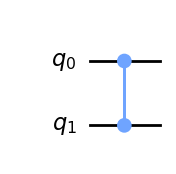

In [8]:
oracle_Circuit = QuantumCircuit(2, name="Oracle Circuit")
oracle_Circuit.cz(control_qubit=0, target_qubit=1)
oracle_Circuit.to_gate()
oracle_Circuit.draw(output='mpl')

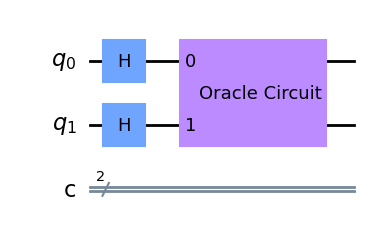

In [9]:
main_Circuit = QuantumCircuit(2, 2)
main_Circuit.h([0, 1])
main_Circuit.append(oracle_Circuit, [0, 1])
main_Circuit.draw(output='mpl')

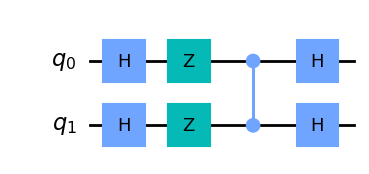

In [10]:
reflection_Circuit = QuantumCircuit(2, name="Reflection Circuit")
reflection_Circuit.h([0, 1])
reflection_Circuit.z([0, 1])
reflection_Circuit.cz(control_qubit=0, target_qubit=1)
reflection_Circuit.h([0, 1])
reflection_Circuit.to_gate()
reflection_Circuit.draw(output='mpl')

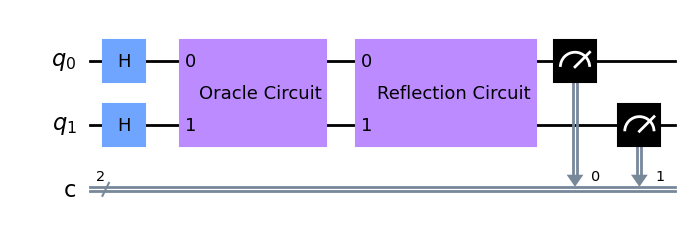

In [11]:
main_Circuit.append(reflection_Circuit, [0, 1])
main_Circuit.measure([0, 1], [0, 1])
main_Circuit.draw(output='mpl')

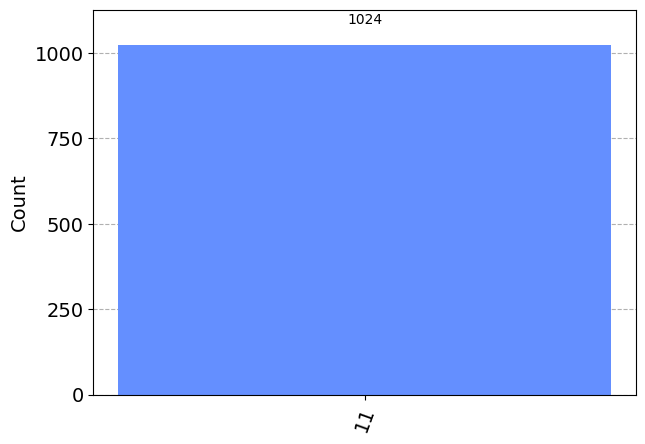

In [12]:
qasm_Simulator = Aer.get_backend('qasm_simulator')
counts = execute(main_Circuit, backend=qasm_Simulator, shots=1024).result().get_counts()
# Winning state is 11.
plot_histogram(counts)